# PCA
Only group filtering but no TIC normalization

In [49]:
library(glue)

In [50]:
exp_label = "postGroupFilt"

In [51]:
input_matrix_name = "../../output/preprocessing_59/log2_groupFil0.3_HILICpos_featab.csv"
meta_data_name = "../../input/sequence_file/clean_meta_df.csv"

In [52]:
rn = sample(1:100, 1)
output_dir <- glue("../../output/PCA/postGrpFilt_{rn}")
dir.create(output_dir)

In [53]:
df = read.table(input_matrix_name, header = TRUE,sep = ',',row.name = 1)
meta_df = read.table(meta_data_name, header = TRUE, sep = ',')

In [54]:
# since the meta_df originally have techincal replicates, which is not unique after technical replicate summaries
# Thus processing metadata a little bit to retain only relevant rows
sub_meta_df <- meta_df[c('tID_dedup','class','biological_samples','cell_number')]
sub_meta_df <- unique(sub_meta_df)

rownames(sub_meta_df) = sub_meta_df$tID_dedup

In [55]:
data.df = df[,grep('R5pos\\_[0-9]+|R5neg\\_[0-9]+|Naive\\_[0-9]+',colnames(df))]

In [56]:
head(data.df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.75765,16.52419,16.44929,16.77645,16.93224,16.84714,NA,15.41647,14.45488
F4,24.10493,24.49154,24.48754,25.17862,24.90136,25.31232,23.60951,23.87856,24.09372
F20,17.00745,18.76444,16.20722,17.91952,18.05028,17.25370,16.35059,17.15370,17.38234
F24,16.12436,16.08670,18.13540,18.26475,17.82186,18.41037,NA,NA,17.52375
F25,20.59751,21.55389,21.37772,22.32204,21.98496,22.39261,NA,20.34808,20.42396
F51,20.22740,21.12595,20.61648,19.71338,20.20959,19.89860,NA,19.98372,19.84863


In [57]:
if(any(data.df[!is.na(data.df)] > 10000)) {
    data.df[data.df == 0] = NA
    data.df.log2 = log2(data.df)
} else {
    data.df.log2 = data.df
}

In [58]:
head(data.df.log2)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.75765,16.52419,16.44929,16.77645,16.93224,16.84714,NA,15.41647,14.45488
F4,24.10493,24.49154,24.48754,25.17862,24.90136,25.31232,23.60951,23.87856,24.09372
F20,17.00745,18.76444,16.20722,17.91952,18.05028,17.25370,16.35059,17.15370,17.38234
F24,16.12436,16.08670,18.13540,18.26475,17.82186,18.41037,NA,NA,17.52375
F25,20.59751,21.55389,21.37772,22.32204,21.98496,22.39261,NA,20.34808,20.42396
F51,20.22740,21.12595,20.61648,19.71338,20.20959,19.89860,NA,19.98372,19.84863


In [59]:
sub_meta_df = sub_meta_df[colnames(data.df.log2),]

In [60]:
sub_meta_df

,tID_dedup,class,biological_samples,cell_number
,<chr>,<chr>,<chr>,<int>
Naive_1,Naive_1,Naive,Yes,300
Naive_2,Naive_2,Naive,Yes,300
Naive_3,Naive_3,Naive,Yes,300
R5neg_1,R5neg_1,R5neg,Yes,655
R5neg_2,R5neg_2,R5neg,Yes,687
R5neg_3,R5neg_3,R5neg,Yes,865
R5pos_1,R5pos_1,R5pos,Yes,142
R5pos_2,R5pos_2,R5pos,Yes,200
R5pos_3,R5pos_3,R5pos,Yes,150


In [61]:
library(stringr)
ordered_group_v = str_extract(colnames(data.df.log2),'Naive|R5neg|R5pos')

In [62]:
color_v = c('Naive' = "#888888", 'R5neg' = "#ff0000",'R5pos' = '#0000ff')[ordered_group_v]

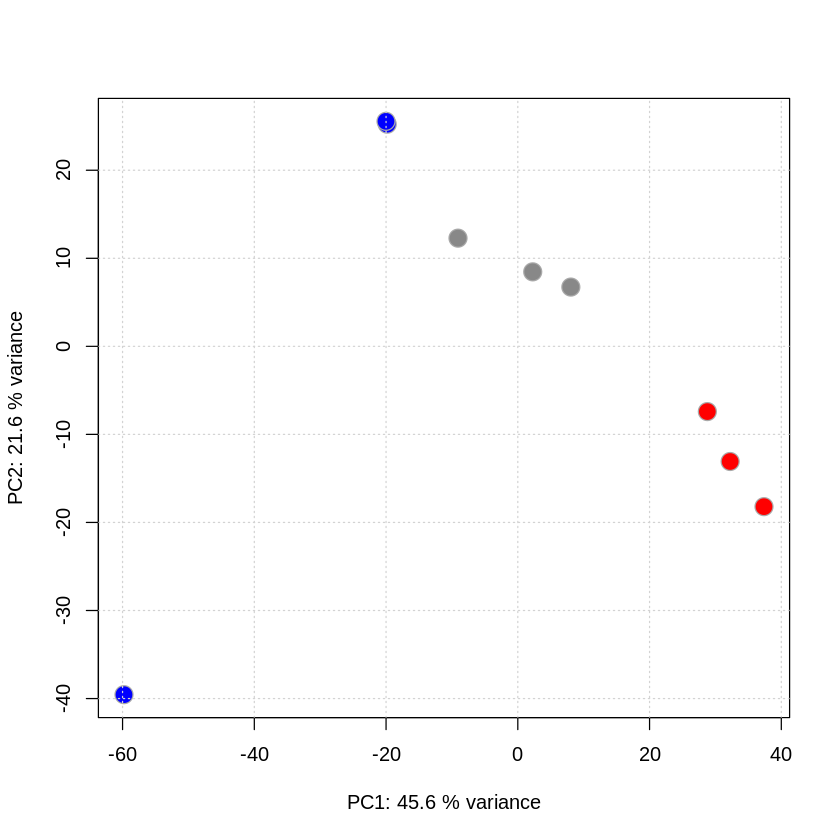

In [63]:
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [64]:
# print the pdf
pdf(file.path(output_dir,glue("{exp_label}_omit_featureswtNA_PCA_no_labels.pdf")))
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)

dev.off()

png 
  2

-----

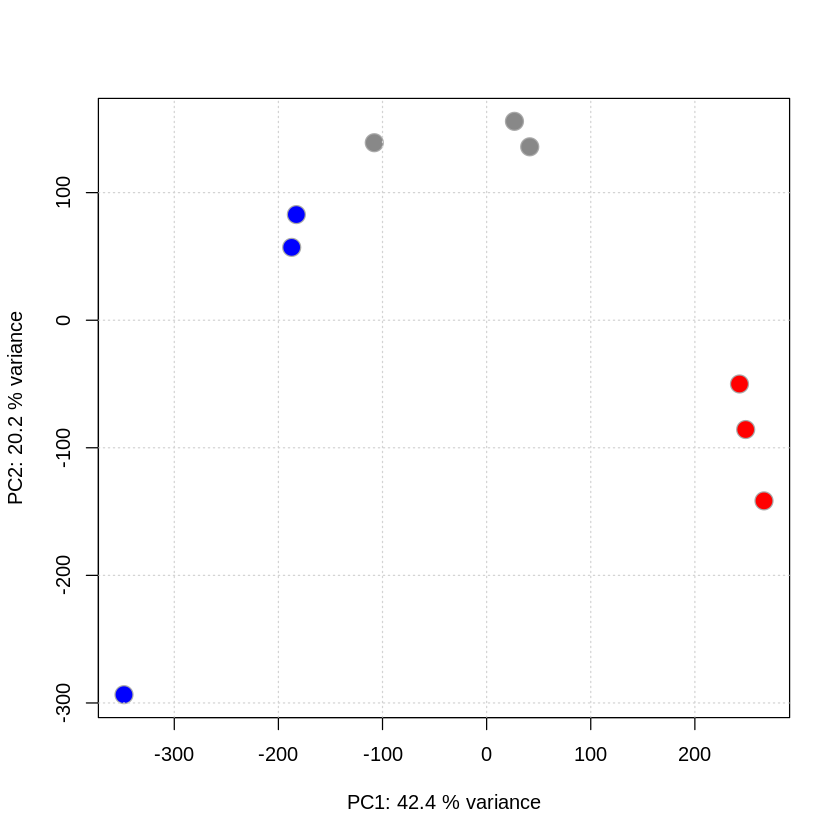

In [65]:
#' Perform the PCA omitting all features with an NA in any of the
data.df.log2.zero = data.df.log2
data.df.log2.zero[is.na(data.df.log2.zero)] = 0
pc <- prcomp(t(data.df.log2.zero), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [66]:
#' Perform the PCA omitting all features with an NA in any of the
data.df.log2.zero = data.df.log2
data.df.log2.zero[is.na(data.df.log2.zero)] = 0

pdf(file.path(output_dir,glue("{exp_label}_keepZero_in_PCA_decomp_no_labels.pdf")))
pc <- prcomp(t(data.df.log2.zero), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)
dev.off()

png 
  2